In [2]:
import cv2

import numpy as np


In [3]:
image = cv2.imread('../fruit/fruits.jpg')

In [4]:
from Ncryptosystem import Cryptosystem, Encryption, Decryption

In [5]:
x = Cryptosystem(image)

m,n: 256 256


In [6]:
key="101011111100110101000001010010110101101101010010100101010100011011001110110110010101111110010110000100010101000011000101100011011011111110011001111110101111111101001001111100111010101110000010000011101100100110000100000111101000100010101101"

In [7]:
a1,b1,x0,y0 = x.generateInitials(key)
print(a1,b1,x0,y0)

18.283025877973234 17.694797580802135 0.6563416916515812 -0.8429732659873648


In [8]:
map1 = x.getChaoticMap(a1,b1,x0,y0)
map2 = x.getChaoticMap(a1,b1,map1[len(map1)-1][0],map1[len(map1)-1][1]) # map2 x0,y0 from the last values of map1 as given in paper
map3 = x.getChaoticMap(a1,b1,map2[len(map2)-1][0],map2[len(map2)-1][1])
map4 = x.getChaoticMap(a1,b1,map3[len(map3)-1][0],map3[len(map3)-1][1])
map5 = x.getChaoticMap(a1,b1,map4[len(map4)-1][0],map4[len(map4)-1][1])
map6 = x.getChaoticMap(a1,b1,map5[len(map5)-1][0],map5[len(map5)-1][1])


In [9]:
cm1 = x.getInterMixMap(a1,b1,map1[len(map1)-1][0],map1[len(map1)-1][1],8)
cm2 = x.getInterMixMap(a1,b1,map2[len(map2)-1][0],map2[len(map2)-1][1],8)
cm3 = x.getInterMixMap(a1,b1,map3[len(map3)-1][0],map3[len(map3)-1][1],8)


In [10]:
rm1 = x.getRuleMap(map2,8)
rm2 = x.getRuleMap(map3,8)
rm3 = x.getRuleMap(map5,8)
rm4 = x.getRuleMap(map6,8)

No of times rule present in rule map
{1: 32256, 2: 32256, 3: 37376, 4: 33792, 5: 34304, 6: 29696, 7: 28672, 8: 33792}
No of times rule present in rule map
{1: 37376, 2: 31488, 3: 34304, 4: 34304, 5: 28672, 6: 34816, 7: 28928, 8: 32256}
No of times rule present in rule map
{1: 39680, 2: 33792, 3: 36096, 4: 28416, 5: 30976, 6: 34816, 7: 30720, 8: 27648}
No of times rule present in rule map
{1: 37376, 2: 34560, 3: 31232, 4: 28928, 5: 31488, 6: 34560, 7: 32256, 8: 31744}


In [11]:
dsm = x.getDSMMap(map4,rm2)

No of times Neucleotides present in DSMap
{'T': 70422, 'C': 68349, 'G': 59387, 'A': 63986}


In [12]:
IV = x.getInitialVector(8,a1,b1,x0,y0)
IVf= x.getfloorIV(8,map1)

Displaying the pixel matrices over the Image


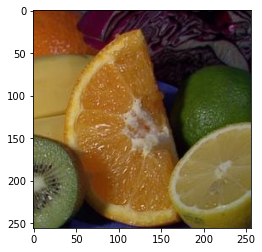

In [13]:
e = Encryption(image)
r,g,b = e.matrices()

### 1. intermix

In [14]:
rd = e.InterMix(r,g,b)
gd = e.InterMix(g,rd,b)
bd = e.InterMix(b,rd,gd)


### 1.2 Mixrows

In [15]:
mr,mg,mb = e.mixRows(rd,gd,bd,IVf)

### 2. ACM

In [16]:
acmR,acmG,acmB = e.applyACM(mr,mg,mb)

m= 256, n= 256,
N(length of side) = 256,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 256, k = 127.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 

### 3. Spiral Mixing

In [17]:
smr = e.SpiralMixing(acmR)
smg = e.SpiralMixing(acmG)
smb = e.SpiralMixing(acmB)

### 4. Encoding

In [18]:
ecdR = e.Encoding(smr,rm1)
ecdG = e.Encoding(smg,rm1)
ecdB = e.Encoding(smb,rm1)

### 5. Substitution

In [19]:
subR = e.Substitution(ecdR,dsm,rm3)
subG = e.Substitution(ecdG,dsm,rm3)
subB = e.Substitution(ecdB,dsm,rm3)

### 6. Decoding

In [20]:
decR = e.Decoding(subR,rm4)
decG = e.Decoding(subG,rm4)
decB = e.Decoding(subB,rm4)

In [21]:
cr = e.toMatrix(decR)
cg = e.toMatrix(decG)
cb = e.toMatrix(decB)

## final cipher image

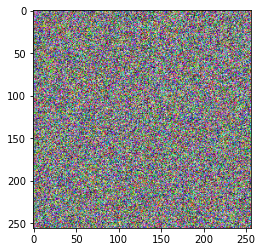

In [21]:
cipher = e.getFinalCipherImage(cr,cg,cb)

# Decryption


In [22]:
d = Decryption(cipher)


Displaying the pixel matrices over the Image


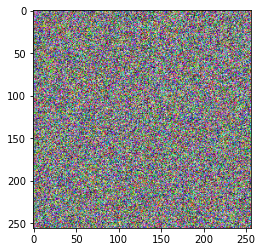

In [23]:
dr,dg,db = d.matrices()

### 1. Reverse Encoding

In [24]:
dencr,dencg,dencb = d.encoding(dr,dg,db,rm4)

### 2. Reverse Substitution

In [25]:
dsubr,dsubg,dsubb = d.revSubstitution(dencr,dencg,dencb,dsm,rm3)

### 3. Reverse Decoding

In [26]:
ddecr,ddecg,ddecb = d.decoding(dsubr,dsubg,dsubb,rm1)

In [27]:
ddecr = d.toMatrix(ddecr)
ddecg = d.toMatrix(ddecg)
ddecb = d.toMatrix(ddecb)

### 4. Reverse Spiral Mixing

In [28]:
dsmr,dsmg,dsmb = d.revSpiralMixing(ddecr,ddecg,ddecb)

### 5. Reverse ACM

In [29]:
dacmr,dacmg,dacmb = d.applyRevACM(dsmr,dsmg,dsmb)

m= 256, n= 256,
N(length of side) = 256,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 256, k = 127.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 

### 6.1 Rev Mixrows

In [30]:
rmrr = d.rmixRow(dacmr,IVf)
rmrg = d.rmixRow(dacmg,IVf)
rmrb = d.rmixRow(dacmb,IVf)


### 6. Reverse Intermix

In [31]:
rrev,grev,brev = d.revInterMix(rmrr,rmrg,rmrb)

## final decoded image

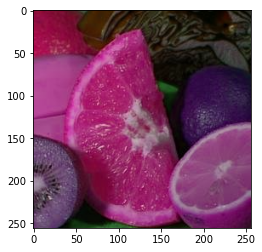

In [32]:
decodeCipher = d.getDecodedImage(rrev,brev,grev)

### checking pixel difference in original,cipher and decoded image

In [33]:
x.checkDiff(r,cr) #original red and cipher red
x.checkDiff(r,rrev) #original red and decoded red

The difference in pixels of the two images is  65265
The difference in pixels of the two images is  0


# Experimental results and analysis

In [60]:
from cryptAnlaysis import experimentalAnalysis

ex = experimentalAnalysis(cipher)

m,n: 256 256


## histogram analysis

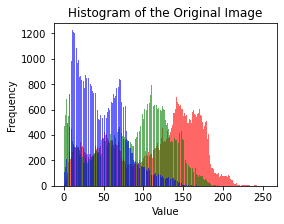

In [61]:
ex.plotHistogram(r,g,b,256)

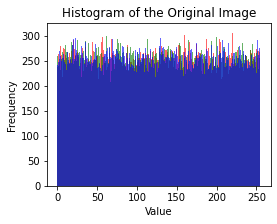

In [62]:
ex.plotHistogram(cr,cg,cb,256)

### variance

In [37]:
vr = ex.variance(r)
vg = ex.variance(g)
vb = ex.variance(b)

vdr = ex.variance(cr)
vdg = ex.variance(cg)
vdb = ex.variance(cb)


In [38]:
print("var of red",vr)
print("var of green",vr)
print("var of blue",vr)
print("var of cipher red",vdr)
print("var of cipher green",vdg)
print("var of cipher blue",vdb)

var of red 3090.297
var of green 3090.297
var of blue 3090.297
var of cipher red 5453.598
var of cipher green 5465.366
var of cipher blue 5475.637


### chi square

In [39]:
print("Chi Square of Cipher Red  ",ex.chiSquare(cr))
print("Chi Square of Cipher Green",ex.chiSquare(cg))
print("Chi Square of Cipher Blue ",ex.chiSquare(cb))

Chi Square of Cipher Red   258.375
Chi Square of Cipher Green 287.0625
Chi Square of Cipher Blue  268.8359375


### entropy


In [40]:
eRed = ex.entropy(r)
eGreen = ex.entropy(g)
eBlue = ex.entropy(b)
cRed = ex.entropy(cr)
cGreen = ex.entropy(cg)
cBlue = ex.entropy(cb)

In [41]:
import pandas as pd
columns = ["Original Red", "Original Blue", "Original Green","Cipher Red", "Cipher Blue", "Cipher Green"]
entropy = pd.DataFrame(columns=columns)
row = [eRed,eGreen,eBlue,cRed,cGreen,cBlue]

entropy = entropy.append(pd.Series(row, index=entropy.columns), ignore_index=True)
entropy.index = ['Entropy of Lenna Image']
entropy

C:\Users\HTC\AppData\Local\Temp\ipykernel_3968\869978253.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entropy = entropy.append(pd.Series(row, index=entropy.columns), ignore_index=True)


,Original Red,Original Blue,Original Green,Cipher Red,Cipher Blue,Cipher Green
Entropy of Lenna Image,7.552131,7.337591,6.745963,7.997164,7.996845,7.997042


### correlation analysis

In [42]:
import numpy as np 
print('horizontal')
print('=======red========\n',ex.corAnalysisH(r))
print('\n=======green========\n',ex.corAnalysisH(g))
print('\n=======blue========\n',ex.corAnalysisH(b))
print('\n')
print('=======cipher red========\n',ex.corAnalysisH(cr))
print('\n=======cipher green========\n',ex.corAnalysisH(cg))
print('\n=======cipher blue========\n',ex.corAnalysisH(cb))

horizontal
=======red========
 0.9762509732695639

=======green========
 0.9341597993732424

=======blue========
 0.8754391077423433


=======cipher red========
 -0.018544519418669858

=======cipher green========
 0.006773913721310111

=======cipher blue========
 -0.006463426093080446


In [43]:
print('vertical')
print('=======red========\n',ex.corAnalysisV(r))
print('\n=======green========\n',ex.corAnalysisV(g))
print('\n=======blue========\n',ex.corAnalysisV(b))
print('\n')
print('=======cipher red========\n',ex.corAnalysisV(cr))
print('\n=======cipher green========\n',ex.corAnalysisV(cg))
print('\n=======cipher blue========\n',ex.corAnalysisV(cb))

vertical
=======red========
 0.9635233504858969

=======green========
 0.954775722679044

=======blue========
 0.9337957302718319


=======cipher red========
 -0.007192389871413518

=======cipher green========
 0.01481997819380566

=======cipher blue========
 0.0077198765422096015


In [44]:
print("diagonal\n")
print('=======red========\n',ex.corAnalysisD(r))
print('\n=======green========\n',ex.corAnalysisD(g))
print('\n=======blue========\n',ex.corAnalysisD(b))
print('\n')
print('=======cipher red========\n',ex.corAnalysisD(cr))
print('\n=======cipher green========\n',ex.corAnalysisD(cg))
print('\n=======cipher blue========\n',ex.corAnalysisD(cb))

diagonal

=======red========
 1.00120554871767

=======green========
 0.9425772323774219

=======blue========
 0.9551040876941886


=======cipher red========
 0.005507816450040634

=======cipher green========
 -0.017433248623640103

=======cipher blue========
 -0.007171319062594916


## NPCR and UACI

In [45]:
br=r.copy()
bg=g.copy()
bb=b.copy()
print(br[128][128],bg[128][128],bb[128][128])


br[128][128] = 117-16
bg[128][128] = 86-32
bb[128][128] = 55-32
print(br[128][128],bg[128][128],bb[128][128])

117 86 55
101 54 23


In [46]:
print(b[128][128])

55


Applying Algorithm Steps one by one

Steps 1: Inter channel Mixing

Step 2: applying Mixrows

Step 3: applying ACM algorithm

m= 256, n= 256,
N(length of side) = 256,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 256, k = 127.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 
Step 4: applying spiral mixing 

Step 5: applying Encoding

Step 6: applying Substitution

Step 7: applying Decoding


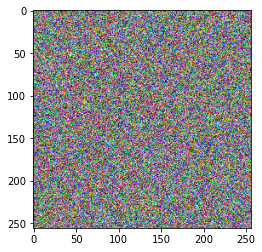

In [47]:
imaged = cv2.merge((bb,bg,br))
cipherd = e.applyEncryption(imaged,IV,rm1,rm3,rm4,dsm)

<img src="..\images\statAttack.jpg">

In [48]:
cbd,cgd,crd = cv2.split(cipherd)

In [49]:
from DifferentialAttack_Analysis import npcr,uaci

In [50]:
print("=====NPCR======")
print(npcr(cr,crd))
print(npcr(cg,cgd))
print(npcr(cb,cbd))

print("=====UACI=====")
print(uaci(cr,crd))
print(uaci(cg,cgd))
print(uaci(cb,cbd))

=====NPCR======
99.62158203125
99.61090087890625
99.578857421875
=====UACI=====
33.34310494217218
33.428416532628674
33.41826195810355


## PSNR

In [25]:
def noiceAttack(image):
    for i in range(0,128):
        for j in range(0,128):
            image[i][j] = 0
    return image

In [26]:
pr = cr.copy()
pg = cg.copy()
pb = cb.copy()

pr = noiceAttack(pr)
pg = noiceAttack(pg)
pb = noiceAttack(pb)

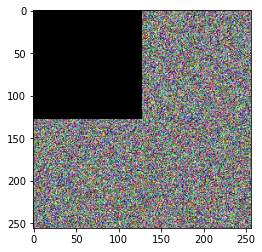

In [27]:
import matplotlib.pyplot as plt
prgb = np.dstack((pr,pg,pb))
plt.imshow(prgb)
plt.show()
Prgb = cv2.merge((pb,pg,pr))

In [28]:
cv2.imshow('prgb',Prgb)
cv2.waitKey(5000)
cv2.destroyAllWindows()

Applying Decryption Algorithm on provided image

Step 1: applying Encoding

Step 2: applying Reverse Substitution

Step 3: applying Decoding

Step 4: applying reverse spiral mixing

Step 5: applying reverse ACM algorithm

m= 256, n= 256,
N(length of side) = 256,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 256, k = 127.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 
Step 6: applying reverse mixrows


Step 7: applying reverse Intermix



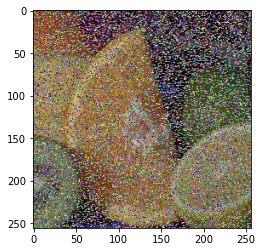

In [54]:
print("Applying Decryption Algorithm on provided image\n")
pb,pg,pr = cv2.split(Prgb)
print("Step 1: applying Encoding\n")
enR,enG,enB = d.encoding(pr,pg,pb,rm4)
print("Step 2: applying Reverse Substitution\n")
rsR,rsG,rsB = d.revSubstitution(enR,enG,enB,dsm,rm3)
print("Step 3: applying Decoding\n")
dcR,dcG,dcB = d.decoding(rsR,rsG,rsB,rm1)
fred = d.toMatrix(dcR)
fgreen = d.toMatrix(dcG)
fblue = d.toMatrix(dcB)
print("Step 4: applying reverse spiral mixing\n")
mixR,mixG,mixB = d.revSpiralMixing(fred,fgreen,fblue)
print("Step 5: applying reverse ACM algorithm\n")
acmR,acmG,acmB = d.applyRevACM(mixR,mixG,mixB)
print("\nStep 6: applying reverse mixrows\n")
mrr,mrg,mrb = d.revmixRows(acmR,acmG,acmB,IV)
print("\nStep 7: applying reverse Intermix\n")
mrR,mrG,mrB = d.revInterMix(mrr,mrg,mrb)
decodedImage = d.getDecodedImage(mrR,mrG,mrB)

In [55]:
decodedImage = cv2.merge((mrB,mrG,mrR))
cv2.imshow('psnr',cipherd)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [56]:
import math
def calculate_PSNR(original_image, cipher_image):
    MSE=0
    m=n=256
    for i in range(0,m):
        row=0
        for j in range(0,n):
             row = row + ((original_image[i][j] - cipher_image[i][j])**2)
        MSE = MSE + row
    MSE = MSE/(m*n)
    
    # Calculate PSNR in decibels
    PSNR = 10 * math.log10((255*255)/MSE)
    return PSNR

In [57]:
import warnings
warnings.filterwarnings("ignore")
print(calculate_PSNR(r,mrR))
print(calculate_PSNR(g,mrG))
print(calculate_PSNR(b,mrB))

8.239881251792367
8.257606805795296
8.21539659603979


In [58]:
print(bin(55))

0b110111


In [59]:
from IPython.display import display, HTML
display(HTML(f'<img src="../fruit/fruits.jpg" style="width:200px; height: 200px; display: inline; margin-right: 20px">' 
             '<img src="../fruit/fruits.jpg" style="width:200px; height: 200px; display: inline; margin-right: 20px">'
             '<img src="../fruit/fruitCipher.png" style="width:200px; height: 200px; display: inline; margin-right: 20px">'
             '<img src="../fruit/fruits.jpg" style="width:200px; height: 200px; display: inline; margin-right: 20px">' 
             ))
spaces = " " * 12
sentence = f"original fruit {spaces}cipher fruit{spaces}decrypted fruit"
print(sentence)

original fruit             cipher fruit            decrypted fruit
